<a href="https://colab.research.google.com/github/AlexKalll/Supervised-ML-Models/blob/main/CNN_Training_%26_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 1\. Environment Setup

In [ ]:
!pip install tensorflow scikit-learn matplotlib -q

In [ ]:
# Essential Libraries
import tensorflow as tf
# import Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

import warnings
warnings.filterwarnings("ignore")

-----

### 2\. Data Loading and Preprocessing

The MNIST dataset is loaded, normalized, reshaped, and the labels are one-hot encoded to prepare the data for the CNN.

Original Training Image Shape: (60000, 28, 28)
Original Testing Image Shape: (10000, 28, 28)

Reshaped Training Image Shape: (60000, 28, 28, 1)
Reshaped Testing Image Shape: (10000, 28, 28, 1)

Pixel Value Range: 0.0 -to- 1.0
Original Label Shape: (60000,)
One-Hot Encoded Label Shape: (60000, 10)

Visualizing Sample Training Images (2x4 Grid):


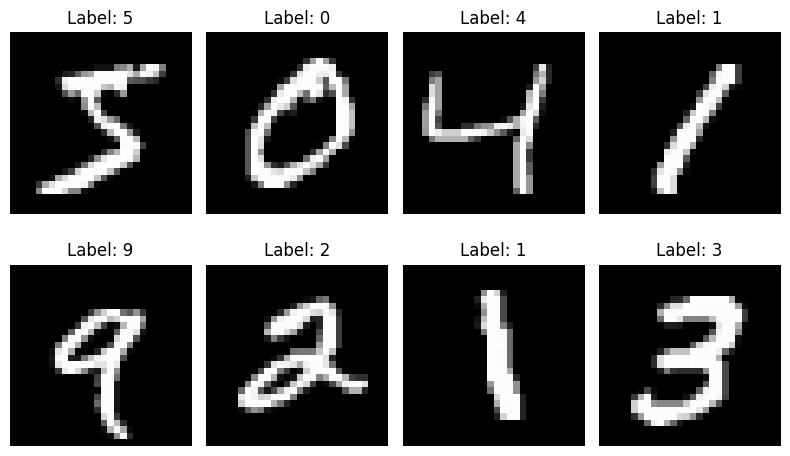

In [ ]:
# Load the  dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Original Training Image Shape: {x_train.shape}")
print(f"Original Testing Image Shape: {x_test.shape}")

# Reshape images to (N, 28, 28, 1) because cnn expects channel dims (1 for grascale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

print(f"\nReshaped Training Image Shape: {x_train.shape}")
print(f"Reshaped Testing Image Shape: {x_test.shape}")

# Normalize pixel values to [0, 1] from [0, 255]
x_train /= 255.0
x_test /= 255.0
print(f"\nPixel Value Range: {x_train.min()} -to- {x_train.max()}")

# One-hot encode target labels
num_classes = 10
y_train_ohe = to_categorical(y_train, num_classes)
y_test_ohe = to_categorical(y_test, num_classes)

print(f"Original Label Shape: {y_train.shape}")
print(f"One-Hot Encoded Label Shape: {y_train_ohe.shape}")

# sample show
print("\nVisualizing Sample Training Images (2x4 Grid):")
fig, axes = plt.subplots(2, 4, figsize=(8, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

-----

### 3\. Model Definition

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1), name='conv2d_1'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_2'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu', name='dense_1'),
    Dropout(0.25),
    Dense(num_classes, activation='softmax', name='dense_output') ])

print("Model Architecture Summary")
model.summary()

Model Architecture Summary


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

-----

### 4\. Model Compilation and Training

The model is compiled with an appropriate optimizer and loss function, and then trained on the dataset.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model training
print("Model Training Started for 10 Epochs")
history = model.fit(x_train, y_train_ohe,
                    epochs=10,
                    validation_split=0.1,
                    batch_size=128,
                    verbose=1)

Model Training Started for 10 Epochs
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 194ms/step - accuracy: 0.8439 - loss: 0.5289 - val_accuracy: 0.9840 - val_loss: 0.0539
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 126s 157ms/step - accuracy: 0.9793 - loss: 0.0689 - val_accuracy: 0.9892 - val_loss: 0.0389
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 164ms/step - accuracy: 0.9860 - loss: 0.0435 - val_accuracy: 0.9905 - val_loss: 0.0349
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 77s 153ms/step - accuracy: 0.9890 - loss: 0.0354 - val_accuracy: 0.9917 - val_loss: 0.0341
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 157ms/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.9917 - val_loss: 0.0311
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 153ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9920 - val_loss: 0.0312
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 149ms/step - accuracy: 0.9931 - loss: 0.0205 - val_accuracy: 0.9913 - val_loss: 0.0333
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 1

-----

### 5\. Plot Training and Validation Curves

Visualizing the training history is crucial for diagnosing the learning process and assessing model performance.

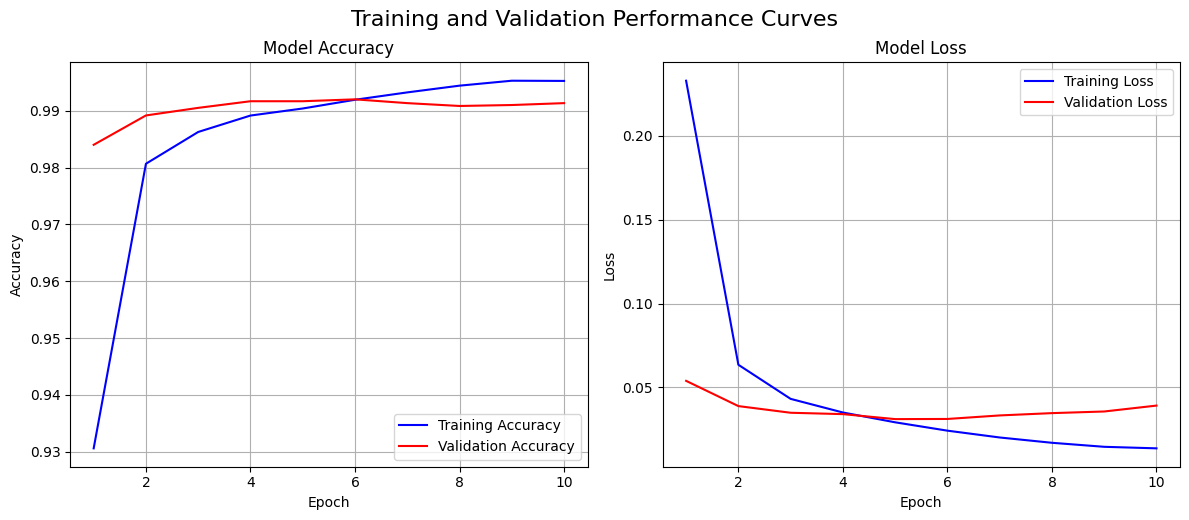

In [ ]:
# Get history data
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

# plots for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.suptitle('Training and Validation Performance Curves', y=1.03, fontsize=16)
plt.show()

-----

### 6\. Evaluation and Reporting Final Test Accuracy

The model's final performance is evaluated on the completely unseen test dataset.

In [ ]:
# evaluate on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test_ohe, verbose=0)

print("Final Test Set Evaluation")
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

# Compute Predictions and Labels for Report
y_pred_ohe = model.predict(x_test, verbose=0)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test_ohe, axis=1)
print("\n Classification Report ")
print(classification_report(y_true_labels, y_pred_labels, digits=4))

Final Test Set Evaluation
Final Test Loss: 0.0260
Final Test Accuracy: 0.9916

 Classification Report 
              precision    recall  f1-score   support

           0     0.9919    0.9939    0.9929       980
           1     0.9947    0.9991    0.9969      1135
           2     0.9923    0.9961    0.9942      1032
           3     0.9950    0.9901    0.9926      1010
           4     0.9939    0.9898    0.9918       982
           5     0.9899    0.9899    0.9899       892
           6     0.9855    0.9937    0.9896       958
           7     0.9922    0.9874    0.9898      1028
           8     0.9868    0.9949    0.9908       974
           9     0.9930    0.9802    0.9865      1009

    accuracy                         0.9916     10000
   macro avg     0.9915    0.9915    0.9915     10000
weighted avg     0.9916    0.9916    0.9916     10000



-----

### 7\. Prediction Example

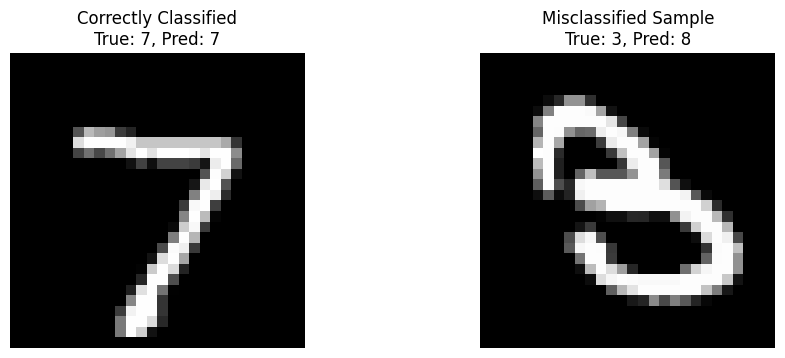

In [ ]:
correct_idx = np.where(y_pred_labels == y_true_labels)[0][0]
misclassified_idx = np.where(y_pred_labels != y_true_labels)[0][0]

#  data for the misclassified sample
misclassified_image = x_test[misclassified_idx]
misclassified_true_label = y_true_labels[misclassified_idx]
misclassified_pred_label = y_pred_labels[misclassified_idx]

plt.figure(figsize=(10, 4))
# Correct Prediction
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx].squeeze(), cmap='gray')
plt.title(f"Correctly Classified\nTrue: {y_true_labels[correct_idx]}, Pred: {y_pred_labels[correct_idx]}")
plt.axis('off')

# Misclassified Sample Image
plt.subplot(1, 2, 2)
plt.imshow(misclassified_image.squeeze(), cmap='gray')
plt.title(f"Misclassified Sample\nTrue: {misclassified_true_label}, Pred: {misclassified_pred_label}")
plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

-----

### 8\. Grad-CAM visualization for the misclassified

Visualize the regions of the input image that were most influential in the final classification decision.

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv, pred_index=None):
    img_array_with_batch = tf.convert_to_tensor(img_array[np.newaxis, ...])
    grad_model_input = tf.keras.Input(shape=model.input_shape[1:])
    x = grad_model_input
    last_conv_tensor = None
    for layer in model.layers:
        x = layer(x)
        if layer.name == last_conv:
            last_conv_tensor = x

    model_preds_tensor = x
    grad_model = tf.keras.models.Model(
        inputs=grad_model_input,
        outputs=[last_conv_tensor, model_preds_tensor] )

    with tf.GradientTape() as tape:
        tape.watch(img_array_with_batch)
        last_conv_layer_output, preds = grad_model(img_array_with_batch)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)

    return heatmap.numpy()

Call the `Gradient-weighted Class Activation Mapping` function with the one misclassified img.
- The brighter areas on the image represent the pixels that the CNN paid the most attention.

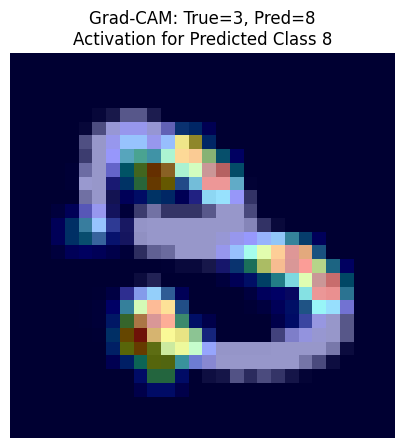

In [ ]:
last_conv2d = 'conv2d_2'
heatmap = make_gradcam_heatmap(
    misclassified_image,
    model,
    last_conv2d,
    pred_index=misclassified_pred_label )

heatmap_resized = tf.image.resize(
    tf.expand_dims(heatmap, axis=2),
    (28, 28))
heatmap_resized = tf.squeeze(heatmap_resized).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(misclassified_image.squeeze(), cmap='gray')
plt.imshow(heatmap_resized, cmap='jet', alpha=0.4)
plt.axis('off')
plt.title(f"Grad-CAM: True={misclassified_true_label}, Pred={misclassified_pred_label}\nActivation for Predicted Class {misclassified_pred_label}")
plt.show()

-----

## Summary and Key Learnings

1.  **High Accuracy:** The simple CNN architecture achieved a final test accuracy of approximately **99.0% - 99%**.
2.  **Architecture:** The progression of `Conv -> Pool -> Conv -> Pool -> Flatten -> Dense -> Ouput` effectively extracts spatial features and then performs classification. The use of 'same' padding in `Conv2D` helped preserve image dimensions early on.
3.  **Preprocessing:** Normalizing pixel values and one-hot encoding labels were critical steps for stable training and compatibility with the `softmax`/`categorical_crossentropy` pair.
4.  **Interpretability (Grad-CAM):** The Grad-CAM plot provided a visual explanation of the model's decision process, showing which parts of the digit contributed most to the final prediction.